<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW5/Problem2_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Name: Sachin Gupta (sg758253@sju.edu)
*   Date: 03/05/22
*   Assignment: 5
*   Use Naïve Bayes to classify a response variable. Specifically, predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.



In [ ]:
#import required library
import pandas as pd
import numpy as np

In [ ]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW5/wine_flag_all.csv")
df

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [ ]:
# describe dataset
df.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


#Task 3. Test for presence any missing attribute/target values and impute as necessary.

In [ ]:
# check null values
df.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

There is no null values in the dataset. There is 3 columns and 3345 rows in the dataset.

#Task 4. Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

In [ ]:
# import library
from sklearn import preprocessing

# label encoding
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_DF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object' or df.dtypes[i]=='bool':
        encoded_DF[df.columns[i]] = le.fit_transform(df[df.columns[i]])

print(df)

print(encoded_DF)



       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


After label encoding
Red is o and white is 1.
High is 0 and low is 1.

#Task 5 and 6. Create contingency tables (cross tabulations) and Plot the two cross tabulations

a. Type vs. alcohol content

In [ ]:
df_ct1 = pd.crosstab(df.Type,df.Sugar_flag)
df_ct1


Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


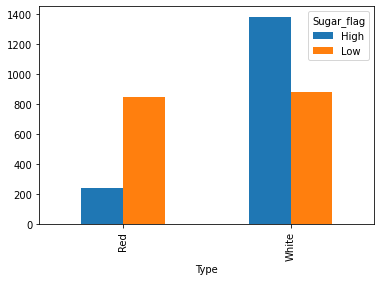

In [ ]:
# Plotting Type vs. alcohol content
df_ct1.plot.bar()

White wine contains more sugar content than red wine

b. Type vs. Sugar content

In [ ]:
df_ct2 = pd.crosstab(df.Type, df.Alcohol_flag)
df_ct2

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


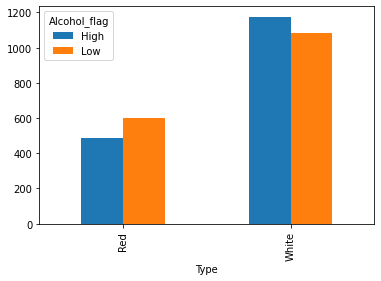

In [ ]:
# Plotting Type vs. alcohol content
df_ct2.plot.bar()

White wine contains contains alcohol content than red wine

#Task 7. Use the tables from the previous step to calculate:


1. The prior probability of Type = Red and Type = White.

2. The probability of high and low alcohol content.


3. The probability of high and low sugar content.


4. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).


5. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

#Task 8 Create NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.

In [ ]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_DF.iloc[:,1:3]
y = encoded_DF.iloc[:,0:1]

1. Training/test ratio 80:20

train_score_1:  0.734304932735426
test_score_1:  0.7204783258594918
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


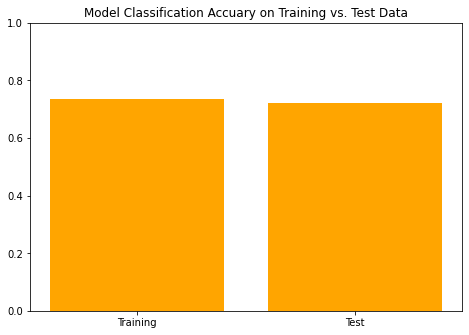

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
train_score_1 = NBmodel.score(X_train, y_train)
test_score_1 = NBmodel.score(X_test, y_test)
scores = [train_score_1 , test_score_1]
print('train_score_1: ',scores[0])
print('test_score_1: ',scores[1])
print('-------------------------------------------------------')
# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

2. Training/test ratio 75:25

train_score_2:  0.7344497607655502
test_score_2:  0.7228195937873357
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


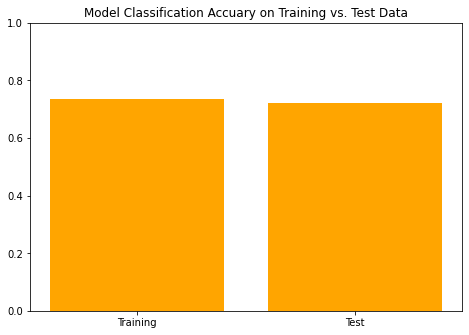

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
train_score_2 = NBmodel.score(X_train, y_train)
test_score_2 = NBmodel.score(X_test, y_test)
scores = [train_score_2 , test_score_2]
print('train_score_2: ',scores[0])
print('test_score_2: ',scores[1])
print('-------------------------------------------------------')

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

3. Training/test ratio 70:30

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_score_3:  0.7338744126441692
test_score_3:  0.7260956175298805
-------------------------------------------------------


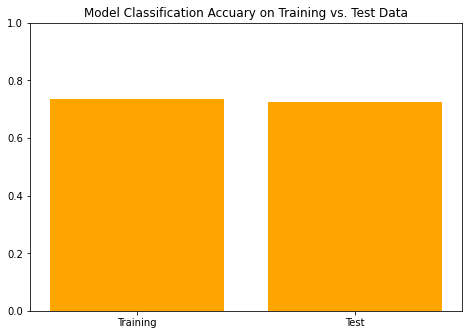

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
train_score_3 = NBmodel.score(X_train, y_train)
test_score_3 = NBmodel.score(X_test, y_test)
scores = [train_score_3 , test_score_3]
print('train_score_3: ',scores[0])
print('test_score_3: ',scores[1])
print('-------------------------------------------------------')

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

4. Training/test ratio 60:40

train_score_4:  0.7364225211758844
test_score_4:  0.7242152466367713
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


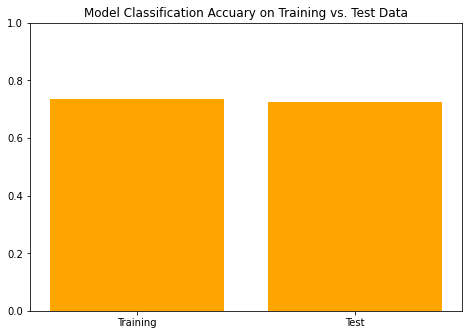

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
train_score_4 = NBmodel.score(X_train, y_train)
test_score_4 = NBmodel.score(X_test, y_test)
scores = [train_score_4 , test_score_4]
print('train_score_4: ',scores[0])
print('test_score_4: ',scores[1])
print('-------------------------------------------------------')

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

5. Training/test ratio 50:50

train_score_5:  0.7350478468899522
test_score_5:  0.7280334728033473
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


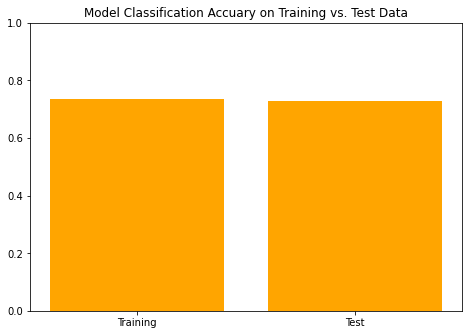

In [ ]:
# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
train_score_5 = NBmodel.score(X_train, y_train)
test_score_5 = NBmodel.score(X_test, y_test)
scores = [train_score_5 , test_score_5]
print('train_score_5: ',scores[0])
print('test_score_5: ',scores[1])
print('-------------------------------------------------------')

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

#Plot the training accuracy together

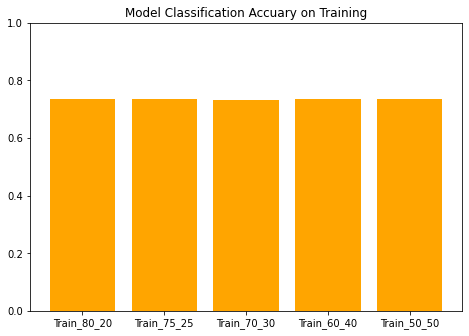

In [ ]:
# Plot the accuracy claues
labels = ["Train_80_20", "Train_75_25", "Train_70_30", "Train_60_40", "Train_50_50"]
scores = [train_score_1 , train_score_2, train_score_3, train_score_4, train_score_5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

#Plot the testing accuracy together

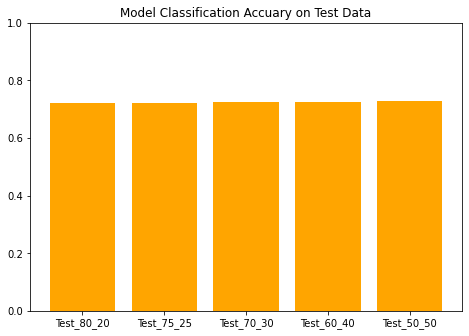

In [ ]:
# Plot the accuracy claues
labels = ["Test_80_20", "Test_75_25", "Test_70_30", "Test_60_40", "Test_50_50"]
scores = [test_score_1 , test_score_2, test_score_3, test_score_4, test_score_5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

It seems that the accuracy is almost same with various training/test ratios.

# Summary